# IMPORT PACKAGES

In [24]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
print("generated random values")
print(x)

generated random values
[[[[ 1.62434536 -0.61175641]
   [-0.52817175 -1.07296862]
   [ 0.86540763 -2.3015387 ]]

  [[ 1.74481176 -0.7612069 ]
   [ 0.3190391  -0.24937038]
   [ 1.46210794 -2.06014071]]

  [[-0.3224172  -0.38405435]
   [ 1.13376944 -1.09989127]
   [-0.17242821 -0.87785842]]]


 [[[ 0.04221375  0.58281521]
   [-1.10061918  1.14472371]
   [ 0.90159072  0.50249434]]

  [[ 0.90085595 -0.68372786]
   [-0.12289023 -0.93576943]
   [-0.26788808  0.53035547]]

  [[-0.69166075 -0.39675353]
   [-0.6871727  -0.84520564]
   [-0.67124613 -0.0126646 ]]]


 [[[-1.11731035  0.2344157 ]
   [ 1.65980218  0.74204416]
   [-0.19183555 -0.88762896]]

  [[-0.74715829  1.6924546 ]
   [ 0.05080775 -0.63699565]
   [ 0.19091548  2.10025514]]

  [[ 0.12015895  0.61720311]
   [ 0.30017032 -0.35224985]
   [-1.1425182  -0.34934272]]]


 [[[-0.20889423  0.58662319]
   [ 0.83898341  0.93110208]
   [ 0.28558733  0.88514116]]

  [[-0.75439794  1.25286816]
   [ 0.51292982 -0.29809284]
   [ 0.48851815 -0.075

# PADDING FUNCTIONS

In [26]:
def zeropad(x,pad):
    xpad = np.pad(x, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    return xpad

In [27]:
print("before padding shape of x is"+str(x.shape))
xpad = zeropad(x,2)
print("after padding shape of x is"+str(xpad.shape))
print("after padding x vector is")
print(xpad)

before padding shape of x is(4, 3, 3, 2)
after padding shape of x is(4, 7, 7, 2)
after padding x vector is
[[[[ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]]

  [[ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0.        ]]

  [[ 0.          0.        ]
   [ 0.          0.        ]
   [ 1.62434536 -0.61175641]
   [-0.52817175 -1.07296862]
   [ 0.86540763 -2.3015387 ]
   [ 0.          0.        ]
   [ 0.          0.        ]]

  [[ 0.          0.        ]
   [ 0.          0.        ]
   [ 1.74481176 -0.7612069 ]
   [ 0.3190391  -0.24937038]
   [ 1.46210794 -2.06014071]
   [ 0.          0.        ]
   [ 0.          0.        ]]

  [[ 0.          0.        ]
   [ 0.          0.        ]
   [-0.3224172 

In [28]:
# plot with images of one array

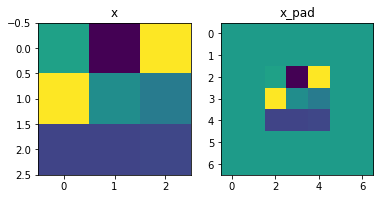

In [29]:
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[1,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(xpad[1,:,:,0])

# CONVOLUTION SINGLE STEP

In [41]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)
print(a_slice_prev)
print(W)
print(b)


[[[ 1.62434536 -0.61175641 -0.52817175]
  [-1.07296862  0.86540763 -2.3015387 ]
  [ 1.74481176 -0.7612069   0.3190391 ]
  [-0.24937038  1.46210794 -2.06014071]]

 [[-0.3224172  -0.38405435  1.13376944]
  [-1.09989127 -0.17242821 -0.87785842]
  [ 0.04221375  0.58281521 -1.10061918]
  [ 1.14472371  0.90159072  0.50249434]]

 [[ 0.90085595 -0.68372786 -0.12289023]
  [-0.93576943 -0.26788808  0.53035547]
  [-0.69166075 -0.39675353 -0.6871727 ]
  [-0.84520564 -0.67124613 -0.0126646 ]]

 [[-1.11731035  0.2344157   1.65980218]
  [ 0.74204416 -0.19183555 -0.88762896]
  [-0.74715829  1.6924546   0.05080775]
  [-0.63699565  0.19091548  2.10025514]]]
[[[ 0.12015895  0.61720311  0.30017032]
  [-0.35224985 -1.1425182  -0.34934272]
  [-0.20889423  0.58662319  0.83898341]
  [ 0.93110208  0.28558733  0.88514116]]

 [[-0.75439794  1.25286816  0.51292982]
  [-0.29809284  0.48851815 -0.07557171]
  [ 1.13162939  1.51981682  2.18557541]
  [-1.39649634 -1.44411381 -0.50446586]]

 [[ 0.16003707  0.87616892  

In [42]:
def convolution_single_step(a_slice_prev, W, b):
    s = a_slice_prev * W
    print(s)
    z=np.sum(s)
    z= z+float(b)
    return z

In [43]:
convolution_single_step(a_slice_prev, W, b)

[[[ 0.19517964 -0.37757796 -0.15854148]
  [ 0.37795303 -0.98874397  0.80402579]
  [-0.36448112 -0.44654162  0.26766851]
  [-0.23218928  0.41755949 -1.82351535]]

 [[ 0.24323087 -0.48116947  0.58154416]
  [ 0.32786971 -0.08423431  0.06634126]
  [ 0.04777032  0.88577236 -2.40548621]
  [-1.59860247 -1.30199961 -0.25349124]]

 [[ 0.14417035 -0.5990611  -0.03878845]
  [ 1.89231409  0.0820284   0.43912088]
  [-0.1591475  -0.30233062  0.15277783]
  [ 0.16968185 -0.12522861 -0.00519314]]

 [[-0.22156233  0.02789749 -1.11316672]
  [ 0.280169   -0.02336965 -1.00256263]
  [-0.89578144  0.31336883 -0.01906739]
  [ 0.40686849  0.08085163  0.16243388]]]


-6.999089450680221

# CONVOLUTION FORWARD

In [60]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    print("no of examples")
    print(m)
    print("height in prev convolution")
    print(n_H_prev)
    print("width in prev convolution")
    print(n_W_prev)
    print("channel in prev convolution")
    print(n_C_prev)
    (f, f, n_C_prev, n_C) = W.shape
    print("filter size")
    print(str(f)+"X"+str(f))
    print("channel in prev convolution")
    print(n_C_prev)
    print("total filter available")
    print(n_C)
    stride = hparameters['stride']
    print("stride")
    print(stride)
    pad = hparameters['pad']
    print("padding")
    print(pad)
    n_H = int((n_H_prev-f+2*pad)/stride)+1
    n_W = int((n_W_prev-f+2*pad)/stride)+1
    print("height in next convolution layer")
    print(n_H)
    print("width in next convolution layer")
    print(n_W)
    Z = np.zeros((m,n_H,n_W,n_C))
    print("output shape is "+str(Z.shape))
    A_prev_pad =zeropad(A_prev, pad)
    print(A_prev_pad.shape)
    for i in range(m):                             
        a_prev_pad = A_prev_pad[i]                             
        print(str(i)+" exmaples is")
        #print(a_prev_pad)
        print("shape of a _prevpad")
        print(a_prev_pad.shape)
        for h in range(n_H):                          
            print("take height is")
            print(h)
            for w in range(n_W):                      
                print("take width is")
                print(w)
                for c in range(n_C):               
                    print("channel is")
                    print(c)
                    vert_start = h*stride # start vertical index
                    vert_end = vert_start+f #end vertical index
                    horiz_start = w*stride #start horizontal index
                    horiz_end = horiz_start+f #end horizonytal index
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:] # creating slices
                    print(a_slice_prev.shape)
                    Z[i, h, w, c] =  convolution_single_step(a_slice_prev, W[...,c], b[...,c])
    assert(Z.shape == (m, n_H, n_W, n_C))
    cache = (A_prev, W, b, hparameters)  
    return Z, cache


In [62]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

no of examples
10
height in prev convolution
4
width in prev convolution
4
channel in prev convolution
3
filter size
2X2
channel in prev convolution
3
total filter available
8
stride
2
padding
2
height in next convolution layer
4
width in next convolution layer
4
output shape is (10, 4, 4, 8)
(10, 8, 8, 3)
0 exmaples is
shape of a _prevpad
(8, 8, 3)
take height is
0
take width is
0
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  0.]]]
channel is
5
(2, 2, 3)
[[[ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0. -0. -0.]
  [ 0.  0.  0.]]]
channel is
6
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -

  [-0.23581318  0.04545928  0.03971455]]]
take width is
3
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  0.]]]
channel is
5
(2, 2, 3)
[[[ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0. -0. -0.]
  [ 0.  0.  0.]]]
channel is
6
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -0.]
  [-0.  0.  0.]]]
channel is
7
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0.  0. -0.]
  [ 0.  0.  0.]]]
take height is
3
take width is
0
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]

7
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0.  0. -0.]
  [ 0.  0.  0.]]]
take width is
2
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  0.]]]
channel is
5
(2, 2, 3)
[[[ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0. -0. -0.]
  [ 0.  0.  0.]]]
channel is
6
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -0.]
  [-0.  0.  0.]]]
channel is
7
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0.  0. -0.]
  [ 0.  0.  0.]]]
take width is
3
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -

  [-0.59309715 -1.05538495 -1.22513472]]]
channel is
1
(2, 2, 3)
[[[-0.90410654 -0.95925744  0.8967992 ]
  [ 0.15597866  0.654528   -1.05501165]]

 [[-0.46012052  0.47451503 -1.89370844]
  [ 0.86603935  0.17280293  0.07161544]]]
channel is
2
(2, 2, 3)
[[[-0.62225119 -0.11002645  0.44405778]
  [-0.46456508 -0.38988359  0.25096136]]

 [[-0.52922705  2.40058735 -0.30739816]
  [ 0.08398773 -1.71466748 -0.40283584]]]
channel is
3
(2, 2, 3)
[[[ 0.54704424  0.65820289  0.00710289]
  [ 0.0739021   0.42626538  3.44139705]]

 [[ 0.26321894 -0.48584363  1.36952718]
  [-0.60586971 -0.67795593  0.56435002]]]
channel is
4
(2, 2, 3)
[[[ 1.18471312 -0.43328357  0.68926775]
  [-0.49535658  0.45481917  1.88946639]]

 [[ 0.0821715   0.56995619  1.45951397]
  [ 0.13045115  2.02528506  0.32552331]]]
channel is
5
(2, 2, 3)
[[[ 0.48046681  0.47203147 -0.02289856]
  [ 0.4582077  -0.31345123  1.39392395]]

 [[-0.12495631  0.98220894 -1.28709299]
  [-0.86228424 -4.89621112  1.62293784]]]
channel is
6
(2, 2, 3)


2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  0.]]]
channel is
5
(2, 2, 3)
[[[ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0. -0. -0.]
  [ 0.  0.  0.]]]
channel is
6
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -0.]
  [-0.  0.  0.]]]
channel is
7
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0.  0. -0.]
  [ 0.  0.  0.]]]
take width is
1
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  

channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  0.]]]
channel is
5
(2, 2, 3)
[[[ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0. -0. -0.]
  [ 0.  0.  0.]]]
channel is
6
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -0.]
  [-0.  0.  0.]]]
channel is
7
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0.  0. -0.]
  [ 0.  0.  0.]]]
take height is
1
take width is
0
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]



(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.]]]
channel is
4
(2, 2, 3)
[[[ 0. -0. -0.]
  [-0. -0.  0.]]

 [[-0. -0.  0.]
  [-0. -0.  0.]]]
channel is
5
(2, 2, 3)
[[[ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0. -0. -0.]
  [ 0.  0.  0.]]]
channel is
6
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -0.]
  [-0.  0.  0.]]]
channel is
7
(2, 2, 3)
[[[ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0.  0. -0.]
  [ 0.  0.  0.]]]
take width is
3
channel is
0
(2, 2, 3)
[[[ 0.  0.  0.]
  [-0.  0.  0.]]

 [[ 0.  0. -0.]
  [ 0.  0. -0.]]]
channel is
1
(2, 2, 3)
[[[-0. -0. -0.]
  [ 0. -0. -0.]]

 [[ 0. -0. -0.]
  [-0. -0.  0.]]]
channel is
2
(2, 2, 3)
[[[-0. -0. -0.]
  [-0.  0.  0.]]

 [[ 0. -0. -0.]
  [-0.  0. -0.]]]
channel is
3
(2, 2, 3)
[[[ 0.  0. -0.]
  [ 0. -0.  0.]]

 [[-0.  0.  0.]
  [ 0.  0.  0.

# MAX POOLING

In [64]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    

    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))              

    for i in range(m):                   
        for h in range(n_H):                 
            for w in range(n_W):                 
                for c in range (n_C):                             
                    vert_start = h*stride
                    vert_end = vert_start+f
                    horiz_start = w*stride
                    horiz_end = horiz_start+f                    
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]                    
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    cache = (A_prev, hparameters)
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [72]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]
mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


In [73]:

def  conv_backward(dZ, cache):
    (A_prev, W, b, hparameters) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    (m, n_H, n_W, n_C) = dZ.shape
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    A_prev_pad = zeropad(A_prev, pad)
    dA_prev_pad = zeropad(dA_prev, pad)
    
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   
            for w in range(n_W):               
                for c in range(n_C): 
                    vert_start = h * stride

                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

# MAX POOLING BACKWARD PASSS

In [74]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))
# print(dA.shape)

dA_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838


In [75]:
def create_mask_from_window(x):
    mask = x == np.max(x)
    return mask

In [76]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


# AVERAGE POOLING BACKWARD PASS

In [77]:
def distribute_value(dz, shape):
    (n_H, n_W) = shape

    average = dz / (n_H * n_W)
    a = np.ones(shape) * average
    
    return a

In [78]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


 # POOLING BACKWARD

In [79]:
def pool_backward(dA, cache, mode = "max"):
    (A_prev, hparameters) = cache
    stride = hparameters["stride"]
    f = hparameters["f"]
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):          
        a_prev = A_prev[i]
        for h in range(n_H):                  
            for w in range(n_W):              
                for c in range(n_C):         
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    if mode == "max":
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        mask = create_mask_from_window(a_prev_slice)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        da = dA[i, h, w, c]
                        shape = (f, f)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [80]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
